# Analyse frequency distribution of words

## Installation des dépendences

In [1]:
import nltk

nltk.download('stopwords')
from nltk.probability import FreqDist
from nltk.draw.dispersion import dispersion_plot

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/charalambos/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Création d'une liste de stopwords

In [2]:
from nltk.corpus import stopwords

sw = stopwords.words("french")
sw += ["les", "plus", "cette", "fait", "faire", "être", "deux", "comme", "dont", "tout", 
       "ils", "bien", "sans", "peut", "tous", "après", "ainsi", "donc", "cet", "sous",
       "celle", "entre", "encore", "toutes", "pendant", "moins", "dire", "cela", "non",
       "faut", "trois", "aussi", "dit", "avoir", "doit", "contre", "depuis", "autres",
       "van", "het", "autre", "jusqu"]
sw = set(sw)

In [3]:
print(f"{len(sw)} stopwords used: {sorted(sw)}")

197 stopwords used: ['ai', 'aie', 'aient', 'aies', 'ainsi', 'ait', 'après', 'as', 'au', 'aura', 'aurai', 'auraient', 'aurais', 'aurait', 'auras', 'aurez', 'auriez', 'aurions', 'aurons', 'auront', 'aussi', 'autre', 'autres', 'aux', 'avaient', 'avais', 'avait', 'avec', 'avez', 'aviez', 'avions', 'avoir', 'avons', 'ayant', 'ayante', 'ayantes', 'ayants', 'ayez', 'ayons', 'bien', 'c', 'ce', 'cela', 'celle', 'ces', 'cet', 'cette', 'comme', 'contre', 'd', 'dans', 'de', 'depuis', 'des', 'deux', 'dire', 'dit', 'doit', 'donc', 'dont', 'du', 'elle', 'en', 'encore', 'entre', 'es', 'est', 'et', 'eu', 'eue', 'eues', 'eurent', 'eus', 'eusse', 'eussent', 'eusses', 'eussiez', 'eussions', 'eut', 'eux', 'eûmes', 'eût', 'eûtes', 'faire', 'fait', 'faut', 'furent', 'fus', 'fusse', 'fussent', 'fusses', 'fussiez', 'fussions', 'fut', 'fûmes', 'fût', 'fûtes', 'het', 'il', 'ils', 'j', 'je', 'jusqu', 'l', 'la', 'le', 'les', 'leur', 'lui', 'm', 'ma', 'mais', 'me', 'mes', 'moi', 'moins', 'mon', 'même', 'n', 'ne', '

## Visualiser les termes les plus fréquents

In [4]:
path = "../data/all.txt"
limit = 10**8

with open(path, encoding='latin-1') as f:
    text = f.read()[:limit]

In [5]:
# détecter les mots
words = nltk.wordpunct_tokenize(text)
print(f"{len(words)} words found")

27991327 words found


In [6]:
words[:10]

['V', 'I', 'L', 'L', 'E', 'DE', 'BRUXELLES', 'bulletin', 'ires', '8Ã']

In [7]:
kept = [w.lower() for w in words if len(w) > 2 and w.isalpha() and w.lower() not in sw]
voc = set(kept)
print(f"{len(kept)} words kept ({len(voc)} different word forms)")

6616710 words kept (134418 different word forms)


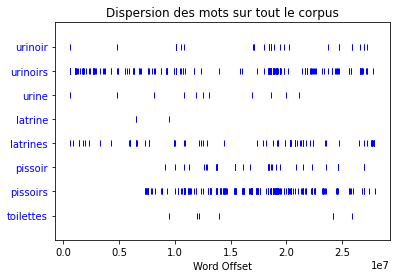

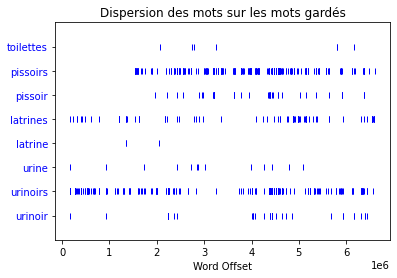

In [8]:
mictions = ["urinoir","urinoirs","urine","latrine","latrines","pissoir","pissoirs","toilettes"]
dispersion_plot(words,mictions, title="Dispersion des mots sur tout le corpus")
dispersion_plot(kept,mictions, title="Dispersion des mots sur les mots gardés",ignore_case=True)

In [9]:
fdist = nltk.FreqDist(kept)
fdist.most_common(50)

[('rue', 63176),
 ('prã', 56552),
 ('conseil', 44728),
 ('francs', 43658),
 ('ville', 43652),
 ('collã', 38210),
 ('section', 28720),
 ('ãªtre', 27148),
 ('bruxelles', 27126),
 ('art', 26315),
 ('bourgmestre', 24882),
 ('travaux', 22898),
 ('administration', 21263),
 ('rapport', 20877),
 ('intã', 18831),
 ('annã', 16815),
 ('crã', 16796),
 ('messieurs', 16465),
 ('demande', 15464),
 ('hospices', 15319),
 ('question', 15182),
 ('frais', 15068),
 ('aprã', 14902),
 ('echevin', 14783),
 ('mãªme', 14737),
 ('service', 14720),
 ('tre', 14632),
 ('ance', 14597),
 ('somme', 13917),
 ('communal', 13712),
 ('prix', 13596),
 ('penses', 13590),
 ('tres', 12850),
 ('avis', 12819),
 ('projet', 12774),
 ('place', 12694),
 ('lieu', 12662),
 ('finances', 12661),
 ('partie', 12552),
 ('propriã', 12547),
 ('pense', 12455),
 ('budget', 12421),
 ('tait', 12279),
 ('publique', 12244),
 ('proposition', 12227),
 ('compte', 12094),
 ('police', 11991),
 ('exã', 11240),
 ('droit', 11109),
 ('nombre', 10949)]

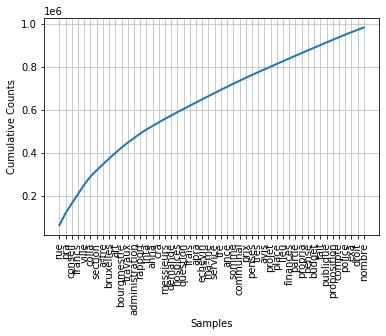

In [10]:
fdist.plot(50, cumulative=True)

In [11]:
# Impression des mots qui n'apparaissent qu'une fois dans le corpus
fdist.hapaxes()[:30]

['anas',
 'enraisonde',
 'bieniã',
 'eldeseiã',
 'dtput',
 'phonnenr',
 'umsderb',
 'espourvica',
 'edâ',
 'imrac',
 'offrantã',
 'differens',
 'philanlropique',
 'advã',
 'cemtimes',
 'noretnbre',
 'lichtendael',
 'apet',
 'huiquitle',
 'phospiee',
 'mnll',
 'parferez',
 'boulavard',
 'surveillerait',
 'commel',
 'gav',
 'reinboursement',
 'vaj',
 'consacriez',
 'autorisantl']

In [12]:
long_words = [w for w in voc if len(w) > 15]
sorted(long_words)[:30]

['aapprovisionnements',
 'ablesarriventqueã',
 'abonncmentannuel',
 'absolumentmalsain',
 'abstractiveinent',
 'accidenlelleinent',
 'accidentellement',
 'accoinplisscmentdcsconditionsprescritesparfart',
 'accompagnateursdesclassesde',
 'accompagneraient',
 'accomplissementdel',
 'acconiplisscmeul',
 'accueillirfavorablement',
 'achatdeprovisions',
 'achtergatstraetje',
 'acidechlorhydrique',
 'actuellementprostituã',
 'adesratification',
 'adininislratioit',
 'adiriinistration',
 'adjiiiitistrations',
 'adjointcommissaire',
 'adjointinspecteur',
 'adjointscommissaires',
 'adjointsinspecteurs',
 'adjointsiuspecteurs',
 'adjugerlcsstations',
 'admiiiislraiioiipa',
 'admiministration',
 'admininistration']